In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set_style('whitegrid')
sns.set_context('notebook')
from matplotlib import style
style.use('dark_background')

In [2]:
df = pd.read_csv('kyphosis.csv')

In [3]:
df.head()

,Kyphosis,Age,Number,Start
0,absent,71,3,5
1,absent,158,3,14
2,present,128,4,5
3,absent,2,5,1
4,absent,1,4,15


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 81 entries, 0 to 80
Data columns (total 4 columns):
Kyphosis    81 non-null object
Age         81 non-null int64
Number      81 non-null int64
Start       81 non-null int64
dtypes: int64(3), object(1)
memory usage: 2.6+ KB


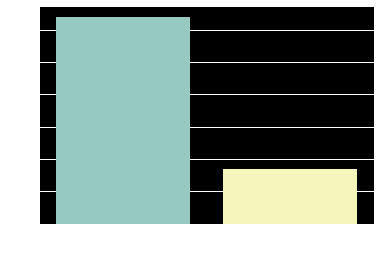

In [9]:
sns.countplot(df['Kyphosis'])

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


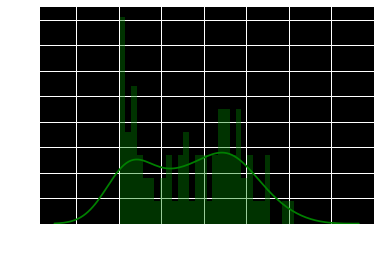

In [13]:
sns.distplot(df['Age'], bins=30, color='green')

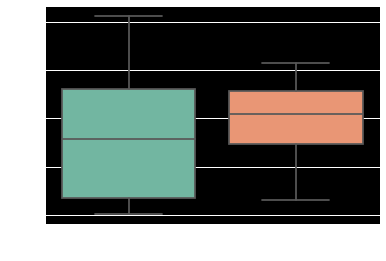

In [17]:
sns.boxplot(x='Kyphosis', y='Age', data=df, palette='Set2')

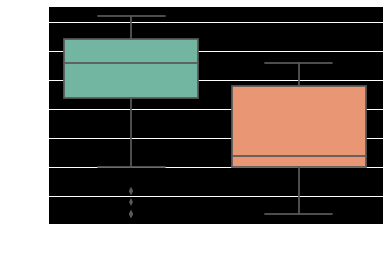

In [18]:
sns.boxplot(x='Kyphosis', y='Start', data=df, palette='Set2')

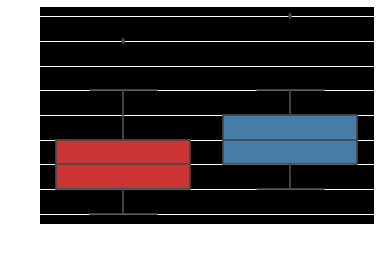

In [20]:
sns.boxplot(x='Kyphosis', y='Number', data=df, palette='Set1')

In [21]:
from sklearn.model_selection import train_test_split

In [26]:
X = df.drop('Kyphosis', axis=1)
y = df['Kyphosis']

In [28]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [6]:
from sklearn.tree import DecisionTreeClassifier

In [7]:
dtree = DecisionTreeClassifier()

In [29]:
dtree.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [30]:
test_predict = dtree.predict(X_test)

In [31]:
from sklearn.metrics import classification_report

In [32]:
print(classification_report(y_test, test_predict))

             precision    recall  f1-score   support

     absent       0.76      0.87      0.81        15
    present       0.50      0.33      0.40         6

avg / total       0.69      0.71      0.69        21



In [34]:
dtree.feature_importances_

array([0.32492338, 0.0742115 , 0.60086512])

In [39]:
dtree.tree_.node_count

23

In [40]:
from sklearn.ensemble import RandomForestClassifier

In [54]:
rf = RandomForestClassifier(n_estimators=100)

In [55]:
rf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [56]:
test_predict = rf.predict(X_test)

In [57]:
print(classification_report(y_test, test_predict))

             precision    recall  f1-score   support

     absent       0.75      1.00      0.86        15
    present       1.00      0.17      0.29         6

avg / total       0.82      0.76      0.69        21

